## 자연어 처리를 통한 성격 예측 : 데이터 탐색

In [1]:
import numpy as np
import pandas as pd
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from nltk.corpus import stopwords
warnings.filterwarnings('ignore')               # Turn the warnings off.
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [2]:
# 이전에 저장했던 전처리가 완료된 데이터를 가져온다. 
df = pd.read_csv("mbti_new.csv")
df.head(3)

,type,posts
0,INFJ,enfp intj moments sportscenter top ten plays p...
1,ENTP,finding lack posts alarming sex boring positio...
2,INTP,good one course say know blessing curse absolu...


In [15]:
# 전처리 후 데이터를 확인해본다
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8674 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


In [18]:
# 결측지가 존재하므로, 제거한 후 데이터 탐색 및 분석을 진행한다. 

df.dropna(axis = 0, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8674 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8674 non-null   object
 1   posts   8674 non-null   object
dtypes: object(2)
memory usage: 203.3+ KB


In [44]:
# 다시 같은 이름의 csv 파일로 저장해둔다.

df.to_csv("mbti_new.csv", index = False)

In [20]:
# 데이터 탐색을 위해 객체를 복사한다. 
df1 = df.copy()

### 1. 전체 데이터 시각화 

In [22]:
# 람다함수를 이용해 관측치별 게시글 길이를 추출한다.
# 게시글 길이는 최근 올린 50개의 게시글을 합친 길이이다. 
df1['posts'] = df1['posts'].apply(lambda x : len(x))

TypeError: object of type 'int' has no len()

#### 게시글 길이 분포 시각화

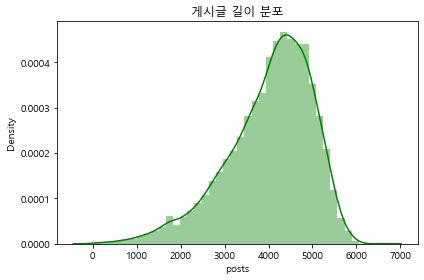

In [23]:
# 히스토그램을 이용하여 게시글 길이의 분포를 확인
sns.distplot(df1.posts , kde=True , bins = 40, color="green")
plt.title('게시글 길이 분포')
plt.tight_layout()
plt.savefig("게시글 길이 분포.png", dpi = 300)
plt.show()

### 2. MBTI 성격유형별 시각화

#### 유형별 관측치 수 시각화

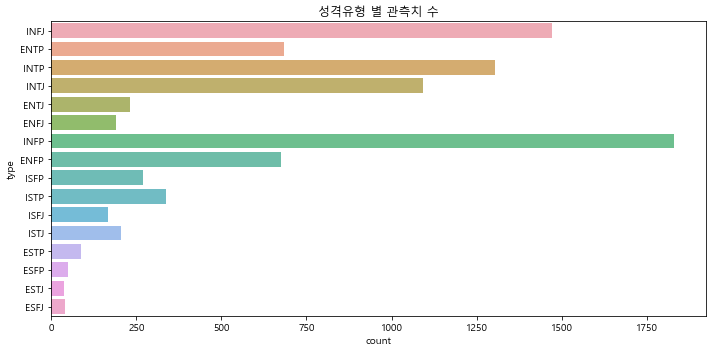

In [24]:
# 각 성격 유형별 관측치 수 확인
plt.figure(figsize=(10, 5))
sns.countplot(y = df['type'], alpha = 0.8)
plt.title("성격유형 별 관측치 수")
plt.tight_layout()
plt.savefig("성격유형별 관측치 수.png", dpi = 300)
plt.show()

#### 성격유형별 평균 게시글 길이 확인

In [28]:
# 성격유형별 데이터의 특성을 파악하기 위해 groupby 메서드 사용
df1 = np.round(df1.groupby("type").mean()).astype("int")

In [29]:
df1.columns = ['성격유형별 평균 게시글 길이']

In [30]:
# 게시글 길이 순으로 내림차순 정렬한다.
df1 = df1.sort_values(by = "성격유형별 평균 게시글 길이", ascending=False)

In [32]:
# 결과 출력
df1

,성격유형별 평균 게시글 길이
type,
INFJ,4160
ESFJ,4141
ENFJ,4113
INFP,4063
ENFP,4043
ENTJ,4042
INTP,4012
ISFJ,4011
INTJ,3991


### 3. 외향-내향 성격 시각화

In [33]:
# 성격유형을 외향-내향형으로 단순화하여 시각화하기 위해 df2객체를 새로 만든다.
df2 = df.copy()

In [34]:
# 새로운 라벨링 - E(Extrovert), I(Introvert)
df2['type'] = df2['type'].apply(lambda x : x[0])
df2

,type,posts
0,I,enfp intj moments sportscenter top ten plays p...
1,E,finding lack posts alarming sex boring positio...
2,I,good one course say know blessing curse absolu...
3,I,dear intp enjoyed conversation day esoteric ga...
4,E,fired another silly misconception approaching ...
...,...,...
8670,I,ixfp always think cats doms reason especially ...
8671,E,thread already exists someplace else heck dele...
8672,I,many questions things would take purple pill p...
8673,I,conflicted right comes wanting children honest...


#### 외향-내향형 성격별 관측치수 확인

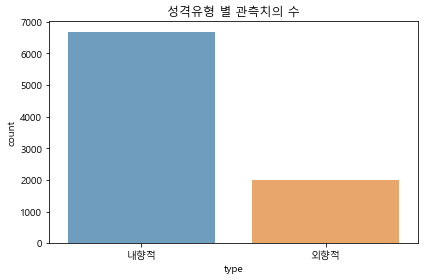

In [35]:
# 외향-내향형 성격별 관측치수 확인
# 샘플 중 내향적 성격인 사람들의 비율이 높다.

sns.countplot(x = df2['type'].replace(['I', 'E'], ['내향적', '외향적']),alpha = 0.7)

plt.title("성격유형 별 관측치의 수")
plt.tight_layout()
plt.savefig("성격유형별 관측치수.png", dpi = 300)
plt.show()

In [36]:
# 정확한 수치 확인

df2.type.value_counts()

I    6675
E    1999
Name: type, dtype: int64

In [37]:
# 결론적으로. 게시글을 통해 내향-외향형 성격을 예측하고자 한다면 모델의 정확도는 최소한 다음 수치보다 높아야 함
# 아래의 수치는 모든 입력값에 대해 내향적이라고 판단했을 때의 정확도 의미.
# 목표 : 정확도를 85%이상으로 올리는 것. 

min_acc = 6676/8675*100
print(min_acc, "%")

76.95677233429394 %


#### 외향-내향형 성격별 평균 게시글 길이 확인

In [38]:
df2['posts'] = df2['posts'].apply(lambda x : len(x))

In [40]:
df2 = np.round(df2.groupby("type").mean()).astype("int")

In [41]:
df2.columns = ['성격유형별 평균 게시글 길이']
df2.index = ['내향적', '외향적']

In [42]:
df2 = df2.sort_values(by = "성격유형별 평균 게시글 길이", ascending=False)

In [43]:
# 외향/내향 유형 별 평균 게시글 길이 내림차순으로 정렬
# 유의미한 차이는 없는 것으로 보임

df2

,성격유형별 평균 게시글 길이
외향적,4031
내향적,4002
